In [1]:
from typing import cast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_lanes = pd.read_csv(
    "../agv_ns_ros_agv/data/AGV_Map/LaneMap-20250310.csv",
    names="index x_begin y_begin x_end y_end".split(),
    index_col=0,
)
df_lanes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1 to 442
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x_begin  442 non-null    float64
 1   y_begin  442 non-null    float64
 2   x_end    442 non-null    float64
 3   y_end    442 non-null    float64
dtypes: float64(4)
memory usage: 17.3 KB


In [3]:
df_transponders = pd.read_csv(
    "../agv_ns_ros_agv/data/AGV_Map/TransMap-20241215.csv",
    names="index x y lane_1 lane_2".split(),
    index_col=0,
)
df_transponders["x"] = df_transponders["x"] / 1000
df_transponders["y"] = df_transponders["y"] / 1000
df_transponders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37062 entries, 1 to 37062
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       37062 non-null  float64
 1   y       37062 non-null  float64
 2   lane_1  37062 non-null  int64  
 3   lane_2  37062 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 MB


In [4]:
df_lanes

,x_begin,y_begin,x_end,y_end
index,,,,
1,475.0,276.5,2095.0,276.5
2,475.0,270.0,2095.0,270.0
3,475.0,266.0,2095.0,266.0
4,475.0,262.0,2095.0,262.0
5,475.0,258.0,2095.0,258.0
...,...,...,...,...
438,517.0,252.0,517.0,300.1
439,501.0,252.0,501.0,322.1
440,496.0,252.0,496.0,300.1


In [5]:
df_unbound_transponders = df_transponders[
    (df_transponders["lane_1"] == 0)
    & (df_transponders["lane_2"] == 0)
]
df_unbound_transponders

,x,y,lane_1,lane_2
index,,,,
14,48.000,278.500,0,0
15,48.000,280.500,0,0
16,48.000,282.500,0,0
17,48.000,284.500,0,0
18,48.000,286.500,0,0
...,...,...,...,...
36989,2091.505,286.497,0,0
36990,2091.505,288.496,0,0
36991,2091.505,300.495,0,0


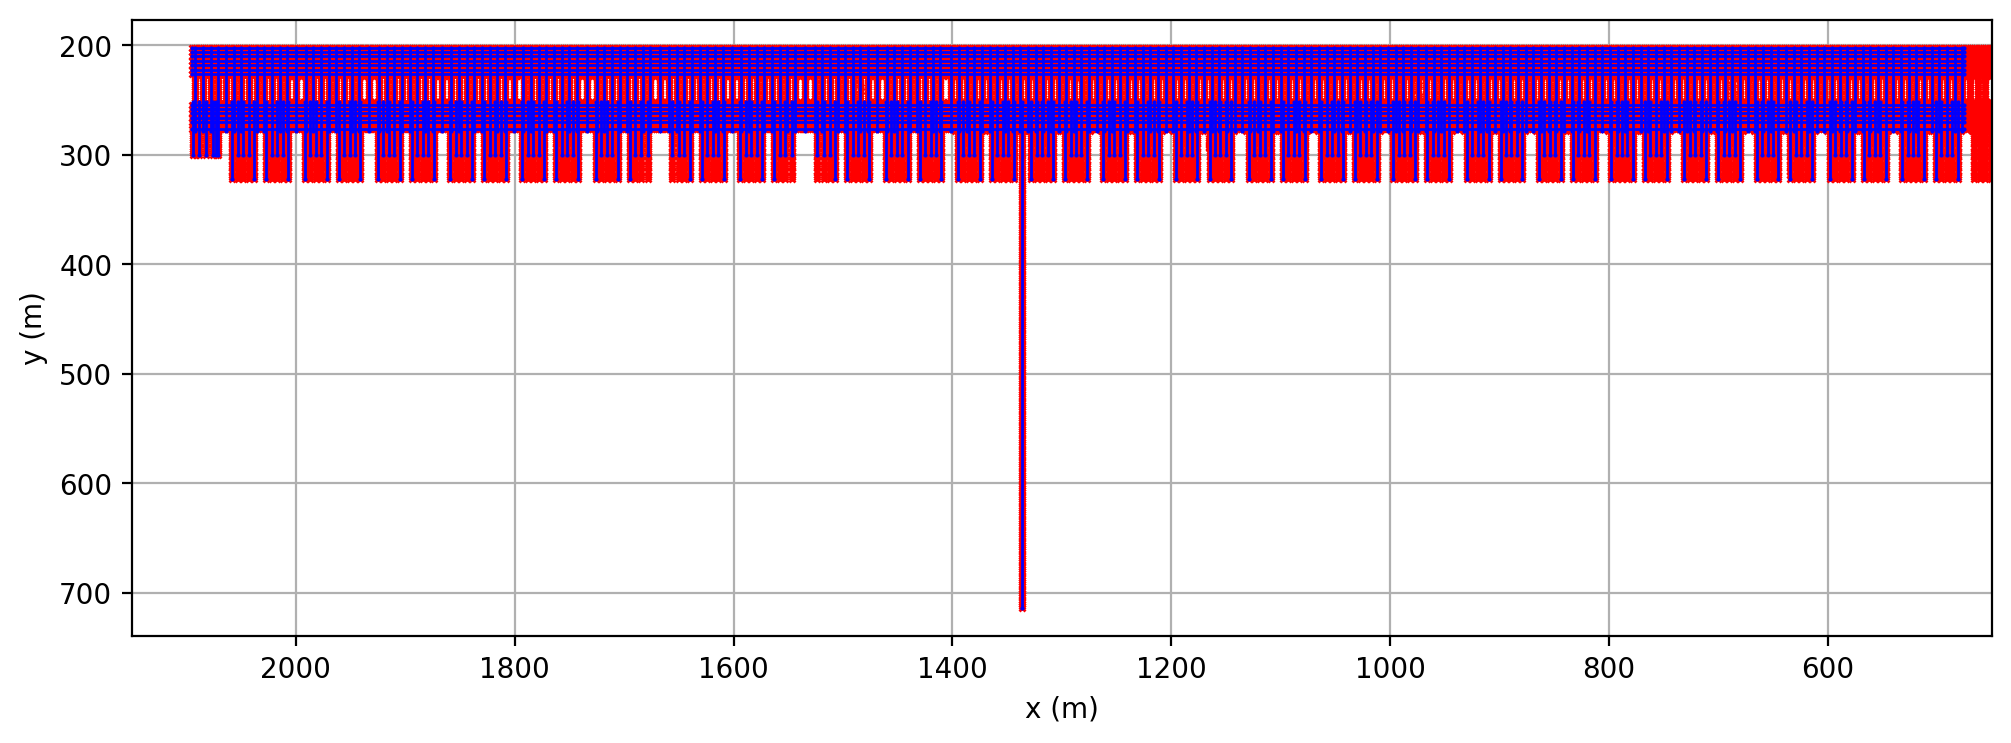

In [6]:
fig = plt.figure(figsize=(12, 6), dpi=200)
fig.set_facecolor("#fff")
ax = fig.add_subplot()

xlim = None
ylim = None
xlim = (450, 2150)
# ylim = (275, 325)

colors: list[str] = []
colors.extend("#f00 #f60 #cc0 #3c0 #0f6 #0cc #19f".split())

n_lanes = len(df_lanes)
n_colors = len(colors)

for index in df_transponders.index:
    lane_index = int(
        cast(np.int64, df_transponders.loc[index, "lane_1"])
    ) - 1
    x = cast(np.float64, df_transponders.loc[index, "x"])
    y = cast(np.float64, df_transponders.loc[index, "y"])
    if (
        ((xlim is not None) and not (xlim[0] <= x <= xlim[1]))
        or ((ylim is not None) and not (ylim[0] <= y <= ylim[1]))
    ):
        continue
    ax.plot(
        x,
        y,
        "x",
        color=(colors[lane_index] if n_colors > n_lanes else "red"),
        ms=2,
    )

for index in df_lanes.index:
    lane_index = int(index) - 1
    ax.plot(
        [df_lanes.loc[index, "x_begin"], df_lanes.loc[index, "x_end"]],  # type: ignore
        [df_lanes.loc[index, "y_begin"], df_lanes.loc[index, "y_end"]],  # type: ignore
        ".-",
        color=(colors[lane_index] if n_colors > n_lanes else "blue"),
        lw=1,
        ms=1,
    )

ax.set(
    xlabel="x (m)",
    ylabel="y (m)",
    xlim=xlim,
    ylim=ylim,
    # xticks=np.arange(525, 826, 25),
    aspect="equal",
)

ax.invert_xaxis()
ax.invert_yaxis()

# for i, index in enumerate(df_unbound_transponders.index):
#     ax.plot(
#         df_unbound_transponders.loc[index, "x"],  # type: ignore
#         df_unbound_transponders.loc[index, "y"],  # type: ignore
#         "x",
#         color="cyan",
#         ms=5,
#         label=("unbound transponder(s)" if i == 0 else None),
#     )

# ax.legend()
ax.grid()